In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read In and Examine Data

Having worked with this dataset before, I know it is very clean and contains no nulls, partial observations, duplicates, or anything else that would 

In [17]:
df = pd.read_csv('insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
from sklearn.model_selection import train_test_split

# Define target variable and input features
X = df.drop(['charges'], axis=1)
y = df['charges']

In [20]:
# Split dataset into train (80%) and test sets (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
df_train = X_train.join(y_train)

In [22]:
df_train

,age,sex,bmi,children,smoker,region,charges
694,27,female,34.800,1,no,southwest,3577.99900
999,36,female,26.885,0,no,northwest,5267.81815
723,19,male,35.400,0,no,southwest,1263.24900
608,28,male,26.980,2,no,northeast,4435.09420
1229,58,male,30.305,0,no,northeast,11938.25595
...,...,...,...,...,...,...,...
1210,36,male,30.875,1,no,northwest,5373.36425
873,43,male,30.100,1,no,southwest,6849.02600
1184,23,female,28.490,1,yes,southeast,18328.23810
130,59,female,26.505,0,no,northeast,12815.44495


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

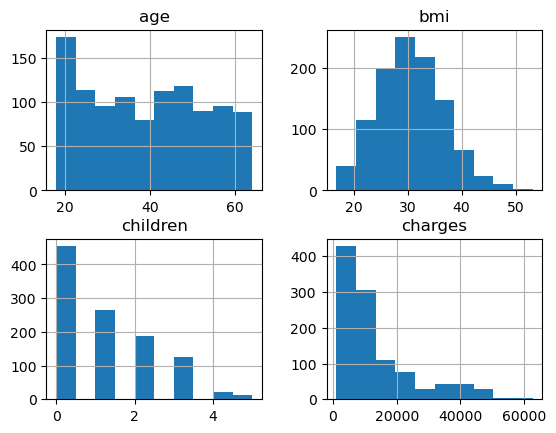

In [23]:
df_train.hist()

In [24]:
# Get correlation map of numerical variables
df_train[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.098831,0.057425,0.298188
bmi,0.098831,1.000000,0.010120,0.163117
children,0.057425,0.010120,1.000000,0.051916
charges,0.298188,0.163117,0.051916,1.000000


<Axes: >

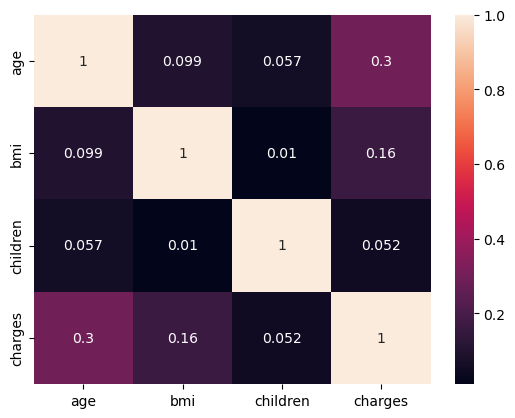

In [25]:
sns.heatmap(df_train[['age','bmi','children','charges']].corr(), annot=True)

# Data Preprocessing

In [26]:
# Charges feature is right-skewed, so we'll use the log of that feature to get a more standard distribution
df_train['charges'] = np.log(df_train['charges'] + 1)

df_test['charges'] = np.log(df_test)

In [30]:
# One hot encode our categorical variables (sex, smoker, region)
df_train = pd.get_dummies(data=df_train, columns=['sex', 'smoker', 'region'])

# Depending on the model we use, we can drop sex_male, smoker_yes, and region_southwest. The values are implied by the rest of the columns and they may cause collinearity issues. 
# For the moment, I am leaving them in to see the impact on model accuracy if they are left in vs. removed.

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
694,27,34.800,1,8.182838,True,False,True,False,False,False,False,True
999,36,26.885,0,8.569561,True,False,True,False,False,True,False,False
723,19,35.400,0,7.142234,False,True,True,False,False,False,False,True
608,28,26.980,2,8.397530,False,True,True,False,True,False,False,False
1229,58,30.305,0,9.387587,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,36,30.875,1,8.589396,False,True,True,False,False,True,False,False
873,43,30.100,1,8.832008,False,True,True,False,False,False,False,True
1184,23,28.490,1,9.816253,True,False,False,True,False,False,True,False
130,59,26.505,0,9.458484,True,False,True,False,True,False,False,False


<Axes: >

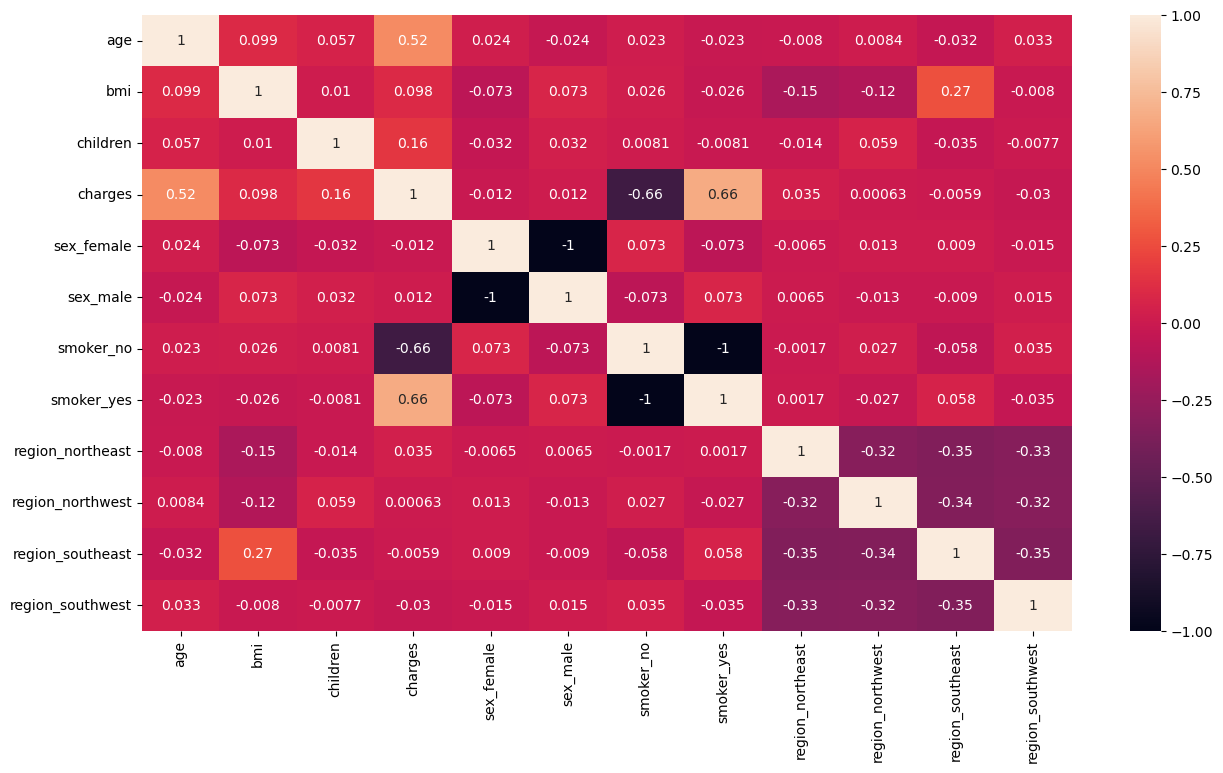

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True)

# Feature Engineering

We're only working with a handful of features and I don't see anything that would be immediately interesting to add based on the existing features, so there is nothing to do here -- at least for the moment.

In [34]:
from sklearn.linear_model import LinearRegression

X_train, y_train = df_train.drop(['charges'], axis=1), df_train['charges']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [35]:
# Apply to test data the transformations applied to training data 
df_test = X_test.join(y_test)

df_test['charges'] = np.log(df_test['charges'] + 1)

df_test = pd.get_dummies(data=df_test, columns=['sex', 'smoker', 'region'])




In [39]:
X_test, y_test = df_test.drop(['charges'], axis=1), df_test['charges']


In [42]:
df_test

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
201,48,32.230,1,9.090673,True,False,True,False,False,False,True,False
840,21,31.100,0,7.331265,False,True,True,False,False,False,False,True
881,23,27.360,1,7.933817,False,True,True,False,False,True,False,False
1207,36,33.400,2,10.556242,False,True,False,True,False,False,False,True
1166,57,40.370,0,9.304150,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1259,52,23.180,0,9.230023,True,False,True,False,True,False,False,False
367,42,24.985,2,8.989452,True,False,True,False,False,True,False,False
678,56,36.100,3,9.422589,False,True,True,False,False,False,False,True
292,25,45.540,2,10.648117,False,True,False,True,False,False,True,False


In [43]:
reg.score(X_test, y_test)

0.8029624296920554